/tmp/ipykernel_3805/2053956209.py:36: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cy,cx = ndimage.measurements.center_of_mass(img)


1/1 [==============================] - 0s 347ms/step
Predicted Digit: 2


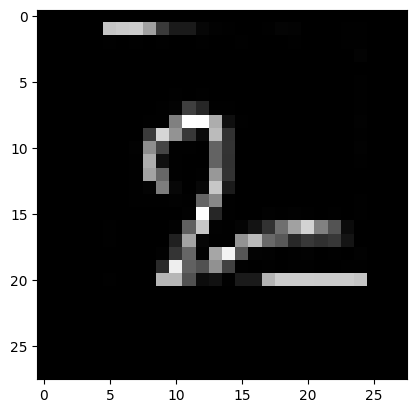

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy.ndimage as ndimage

model = tf.keras.models.load_model('Model/digit_recoginition.h5')

image_path = r'images/sheet/digit/6.jpg'

image = cv2.imread(image_path)

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')

gray = cv2.resize(255-img_gray, (28,28))

np.shape(gray)

plt.imshow(gray, cmap='gray')

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

shiftx,shifty = getBestShift(gray)
shifted = shift(gray,shiftx,shifty)
gray = shifted

plt.imshow(gray)

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(gray, (28, 28))
image = image / 255.0
input_image = np.reshape(image, (1, 28, 28))

predicted_labels = model.predict(input_image)
predicted_digit = np.argmax(predicted_labels)
print(f"Predicted Digit: {predicted_digit}")

plt.imshow(gray, cmap='gray')






In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import scipy.ndimage as ndimage
import os

model = tf.keras.models.load_model('Model/digit_recoginition.h5')

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

def preprocess_image(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    while np.sum(img_gray[0]) == 0:
        img_gray = img_gray[1:]

    while np.sum(img_gray[:,0]) == 0:
        img_gray = np.delete(img_gray,0,1)

    while np.sum(img_gray[-1]) == 0:
        img_gray = img_gray[:-1]

    while np.sum(img_gray[:,-1]) == 0:
        img_gray = np.delete(img_gray,-1,1)

    rows,cols = img_gray.shape

    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        img_gray = cv2.resize(img_gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        img_gray = cv2.resize(img_gray, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    img_gray = np.lib.pad(img_gray,(rowsPadding,colsPadding),'constant')

    shiftx,shifty = getBestShift(img_gray)
    shifted = shift(img_gray,shiftx,shifty)
    img_gray = shifted

    return img_gray

def predict_digit(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)
    preprocessed_image = preprocessed_image / 255.0
    input_image = np.reshape(preprocessed_image, (1, 28, 28))

    predicted_labels = model.predict(input_image)
    predicted_digit = np.argmax(predicted_labels)
    return predicted_digit

directory = r'images/rec/'

for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(directory, filename)
        predicted_digit = predict_digit(image_path)
        print(f"Image: {filename}, Predicted Digit: {predicted_digit}")


C:\Users\nesha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.